In [1]:
import torch
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import glob
from datetime import datetime
import numpy as np
import pandas as pd

C:\Users\s.ezati\Anaconda3\envs\CharSeg\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\s.ezati\Anaconda3\envs\CharSeg\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\s.ezati\Anaconda3\envs\CharSeg\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [65]:
# image = cv2.imread("Segmentation/test/images/21_47_55.005.jpg")
# image = cv2.imread("Segmentation/test/images/170._yolo_out_py.jpg")
image = cv2.imread('1.jpg')

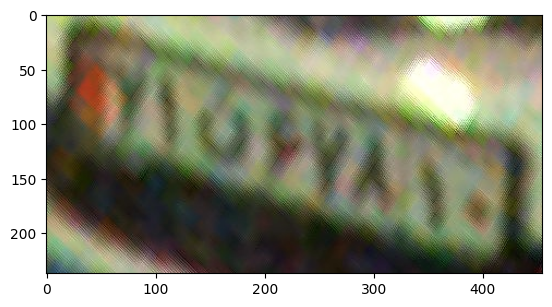

In [66]:
plt.imshow(image)

In [67]:
segmentation_model = YOLO('Segmentation/character-segmentation-best-yolox.pt')

In [68]:
classification_model = YOLO('classification/best.pt')

In [69]:
 plate_dict = {"number part 1":22,
                      "farsi_alphabet": "ت",
                      "number part 3": 768,
                      "splitter": " - ",
                      "number part 4": 33}
    
for key,value in plate_dict.items():
    print(value)
    

22
ت
768
 - 
33


In [87]:
def plate_detection(image , segmentation_model, classification_model):
    start = datetime.now()
    seg_res = segmentation_model.predict(image )[0]
    seg_res_list = seg_res.boxes.data.tolist()
    df = pd.DataFrame(seg_res_list)
    df = df.rename(columns={0: 'x1', 1: 'y1', 2: 'x2', 3: 'y2', 4: 'score', 5: 'class_id'})
    df = df.sort_values(by=['x1'], ascending=True)
    df = df.reset_index(drop=True)
    plate_1 = []
    plate_2 = ["","","","","","","",""]
    for idx in df.index:
        x1, y1, x2, y2, score, class_id = df['x1'][idx], df['y1'][idx], df['x2'][idx], df['y2'][idx], df['score'][idx], df['class_id'][idx]
        if score > 0.7:
            cropped_image = image[int(y1):int(y2), int(x1):int(x2)]
            clf_res = classification_model.predict(cropped_image )
            pred_y = clf_res[0].probs.top1

            if pred_y == 10:
                pred = "معلولین"
            elif pred_y == 11:
                pred = "الف"
            elif pred_y == 12:
                pred = "ب"
            elif pred_y == 13:
                pred = "د"
            elif pred_y == 14:
                pred = "ع"
            elif pred_y == 15:
                pred = "ه"
            elif pred_y == 16:
                pred = "ج"
            elif pred_y == 17:
                pred = "ل"
            elif pred_y == 18:
                pred = "م"
            elif pred_y == 19:
                pred = "ن"
            elif pred_y == 20:
                pred = "پ"
            elif pred_y == 21:
                pred = "ق"
            elif pred_y == 22:
                pred = "ص"
            elif pred_y == 23:
                pred = "س"
            elif pred_y == 24:
                pred = "ط"
            elif pred_y == 25:
                pred = "ت"
            elif pred_y == 26:
                pred = "و"
            elif pred_y == 27:
                pred = "ی"
            else: 
                pred = int(pred_y)
            plate_1.append(pred)
           
        
    if len(plate_1) < 8:
        print(" Warning: image quality is not enough good, some characters missed!")
    
    for item in plate_1:
        item_type= type(item)
        if item_type is str:
            alphabet_index = plate_1.index(item)
        
    if alphabet_index == 0:
        plate_2[2:len(plate_1)+2]= plate_1
    elif alphabet_index == 1:
        plate_2[1:len(plate_1)+1]= plate_1
    elif alphabet_index == 2:
        plate_2[0:len(plate_1)]= plate_1
    else: print("Farsi alphabet is not detected.")
    
        
    part1 = ""+str(plate_2[0])+str(plate_2[1])
    part2 = ""+str(plate_2[2])
    part3 = ""+str(plate_2[3])+str(plate_2[4])+str(plate_2[5])
    part4 = ""+str(plate_2[6])+str(plate_2[7])
#     print(part4,"##4#",part3,"##3#",part2,"##2#",part1,"##1#")
#     print(part1)
    end = datetime.now()
    print("ocr time for a plate:\t",end- start)
    return part4,"-",part3,part2,part1


In [88]:
p1,p2,p3,p4,p5 = plate_detection(image , segmentation_model, classification_model)



0: 352x640 7 characters, 315.0ms
Speed: 3.0ms preprocess, 315.0ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)

0: 64x64 1 1.00, 4 0.00, 7 0.00, dal 0.00, 2 0.00, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 nun 0.98, 5 0.01, lam 0.00, taxi 0.00, vav 0.00, 11.0ms
Speed: 0.0ms preprocess, 11.0ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 6 1.00, 4 0.00, 7 0.00, ta 0.00, 1 0.00, 6.0ms
Speed: 0.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 7 1.00, 2 0.00, 1 0.00, 4 0.00, 3 0.00, 6.1ms
Speed: 0.0ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 8 1.00, ta 0.00, 5 0.00, 6 0.00, PWD 0.00, 6.0ms
Speed: 0.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


ocr time for a plate:	 0:00:00.378143


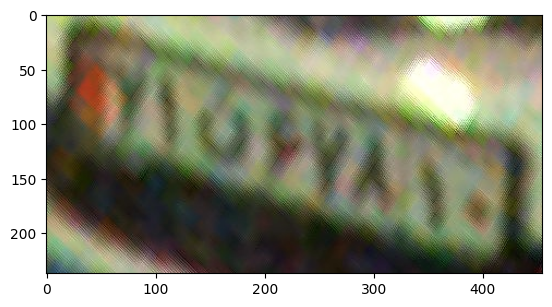

In [89]:
plt.imshow(image)

In [90]:
print(p1,p2,p3,p4,p5)

 - 678 ن 1


In [64]:
#sad train nashode bayad dobare train koni :))